# Topological Data Analysis
## Name: Pragya Shukla
## Roll No: MDS202027

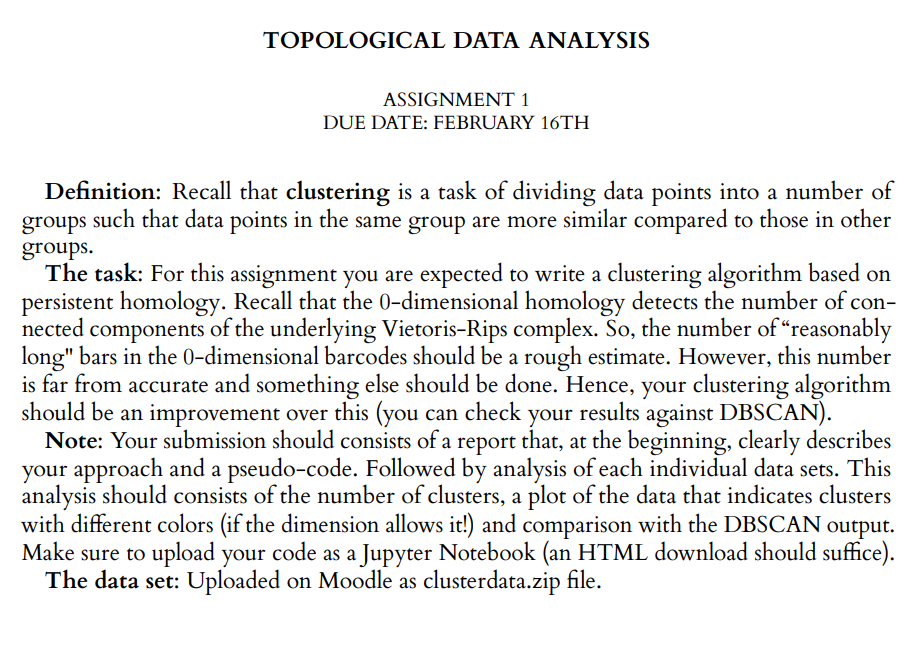

# Report

In this assignment, we have been given 13 Cluster data which can be extracted as dataframe or numpy array. Firstly, we have used PCA to lower down the dimensions for visualization in 2D, then we have tried to keep only the connected components for making clusters that keep in connection for long time. For calculating this, we have made use of death time cutoff which is simply determined by mean and standard deviation of death. Then we have initialized the lists of cluster list as a list of n number of empty lists. The procedure is to add the first point and for all the unassigned points. For this, we have checked if the point lies within the cutoff of death time distance of any point in the assigned points on that cluster. Once there are no more points to add to that cluster, we have repeated the same process with the next cluster. Finally, we have added the cluster information to the data frame and have compared the scatterplot of the clusters with DBScan Clustering algorithm. This we have done for all 13 datasets.

## Table of Contents

**Total Datasets: 13**

**Steps:**

<ul><li>Import Libraries</li>
    <li>Apply PCA for Dataset</li>
<li>Finding the Death time and number of clusters</li>
<li>Generate distance matrix and initialize empty clusters</li>
<li>Add points to clusters</li>
<li>Label the clusters</li>
<li>Find DBScan clustering results</li>
<li>Plotting the final outputs</li>
    <ul>
<li>PCA Scatter Plot</li>
<li>Clusters made from death time cutoff</li>
        <li>Clusters made from DBScan</li>
    <li>Persistence Diagram</li></ul>
<li>Analysis</li>

**Import Libraries**

In [1]:
from ripser import ripser
import numpy as np
from persim import plot_diagrams , PersistenceImager
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import distance_metrics

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

**Below are some basic functions that do most part of our report above.**

In [2]:
def distance(i, j, distances, fixed_dist):
    if(distances[i,j] <= fixed_dist):
        return True
    return False

def near_cluster(i, cluster, distances, fixed_dist):
    for point in cluster:
        if(distance(i,point,distances,fixed_dist)):
            return True
    return False

def all_assigned_points(clusters):
    assigned = []
    for cluster in clusters:
        for point in cluster:
            assigned.append(point)
    return assigned

def get_cluster(i, clusters):
    for cluster in clusters:
        for point in cluster:
            if(point==i):
                return clusters.index(cluster)

### Reading the dataset

# Dataset 1

In [3]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set01.xlsx"))

### Apply PCA for 2D

In [4]:
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)

### Find the Death time and number of clusters.

In [5]:
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [6]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.6383562548507867
Standard deviation of deaths:              0.2897112279242286
Death time cutoff:                         1.5074899386234724
Number of clusters using this Death time:  5


### Generate distance matrix and initialize empty clusters

In [7]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0

### Add points to clusters

In [8]:
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0

### Label the clusters

In [9]:
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (787, 2)


### Find DBScan clustering results

In [10]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 5


## Plotting the final outputs

### <ol>PCA Scatter Plot

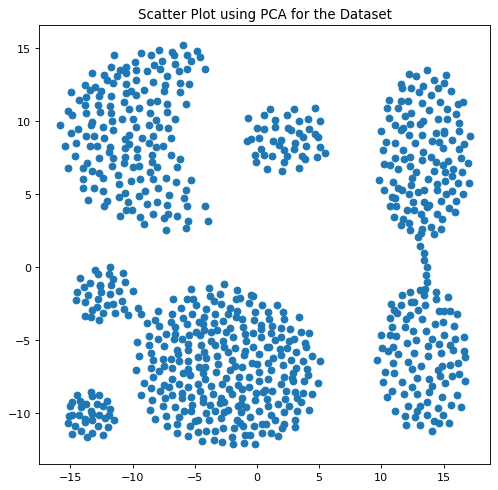

In [11]:
figure(figsize=(16, 16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

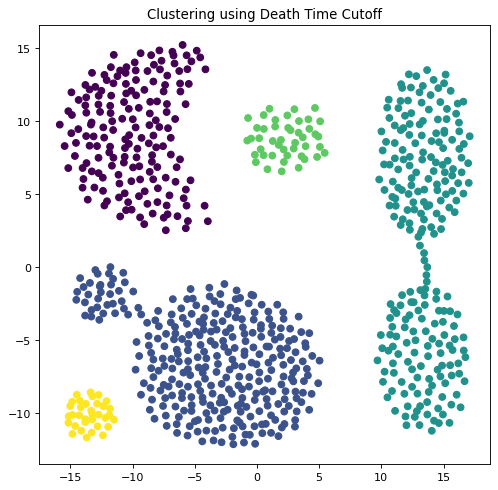

In [12]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

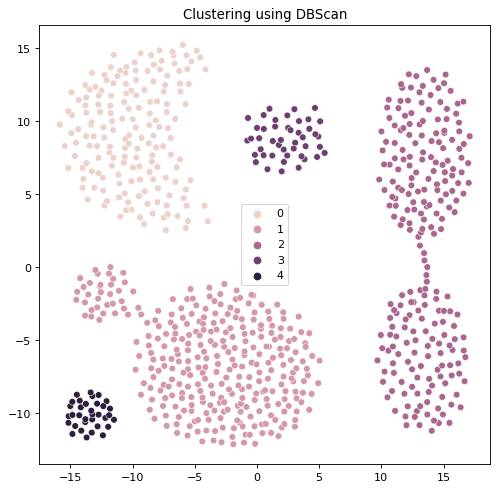

In [13]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


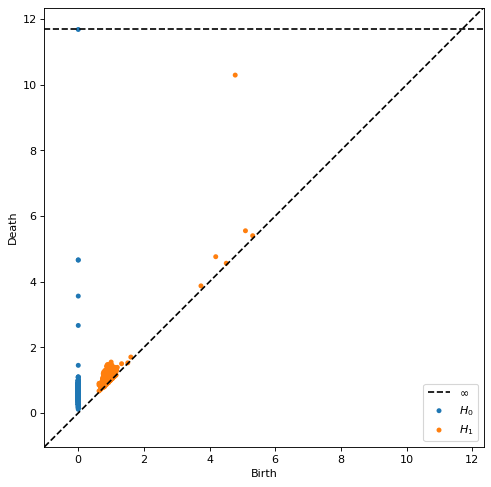

In [14]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 1, we have got 5 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

**We will perform similar tasks for all other datasets as well.**

# Dataset 2

In [15]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set02.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [16]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.6202218856881646
Standard deviation of deaths:              0.1691216327066714
Death time cutoff:                         1.1275867838081788
Number of clusters using this Death time:  2


In [17]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (239, 2)


In [18]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 2


## Plots

### <ol>PCA Scatter Plot

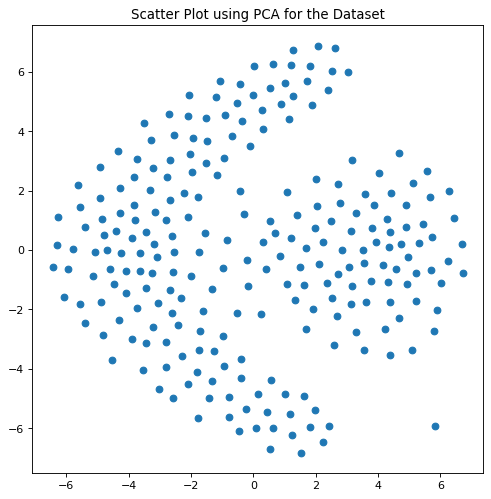

In [19]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

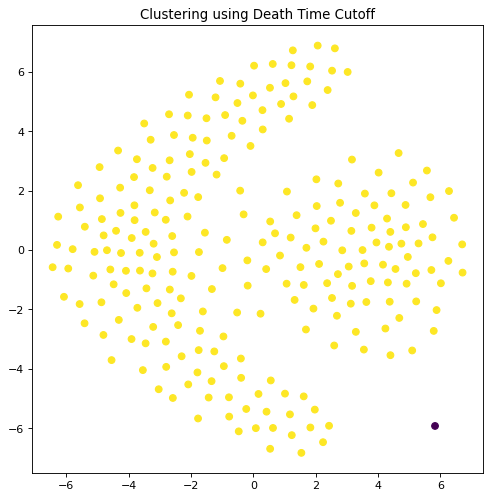

In [20]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

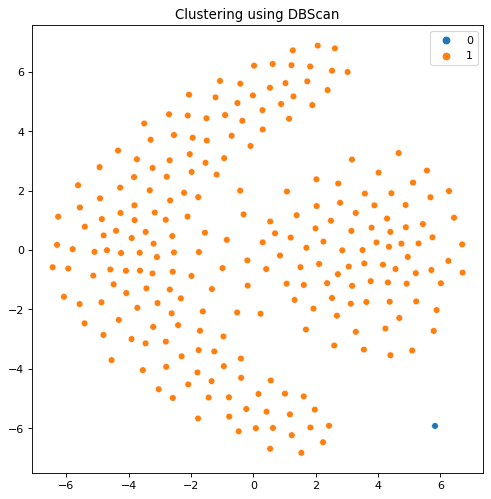

In [21]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


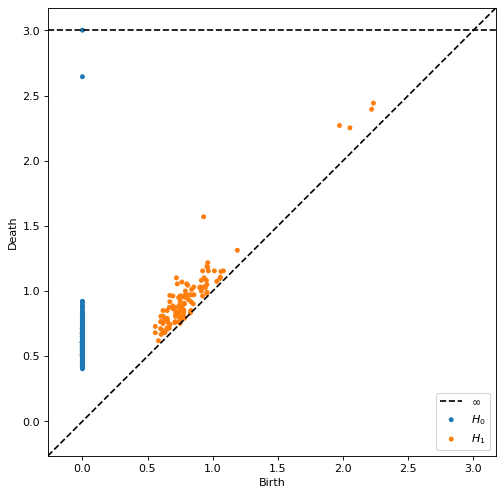

In [22]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 2, we have got 2 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 3

In [23]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set03.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [24]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.6636049342605302
Standard deviation of deaths:              0.44945961054144873
Death time cutoff:                         2.0119837658848763
Number of clusters using this Death time:  12


In [25]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (372, 2)


In [26]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 12


## Plots

### <ol>PCA Scatter Plot

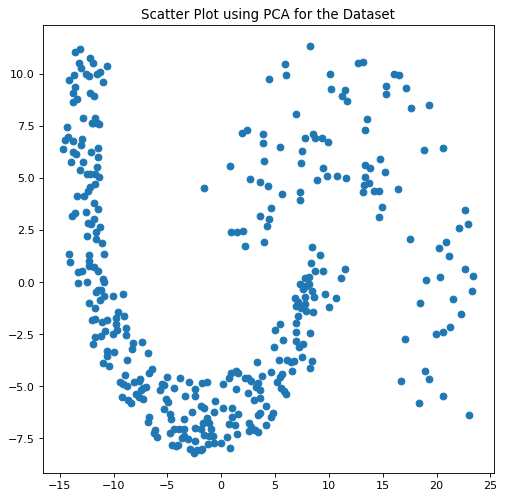

In [27]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

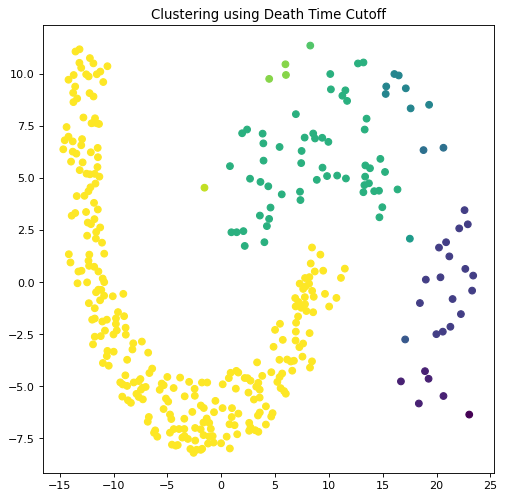

In [28]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

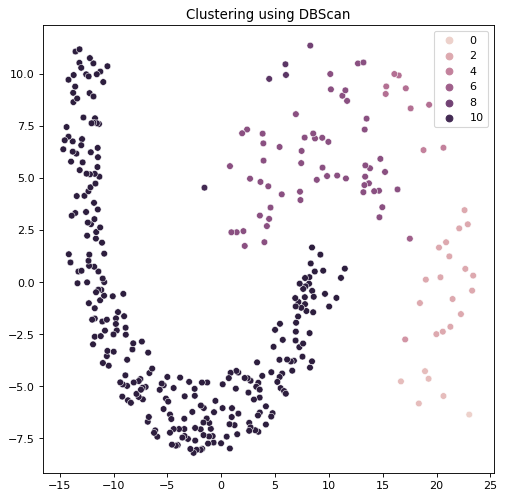

In [29]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


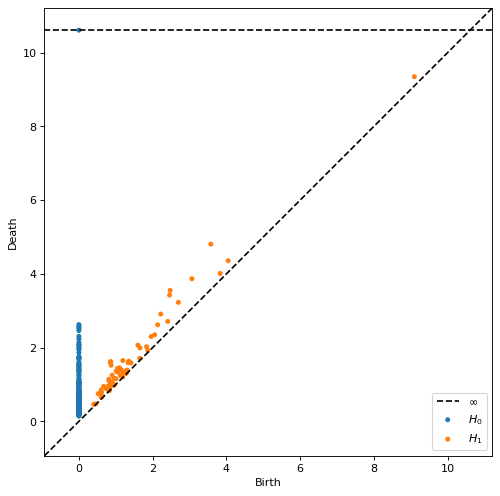

In [30]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 3, we have got 12 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 4

In [31]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set04.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [32]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.8048492925561438
Standard deviation of deaths:              0.4205020762787399
Death time cutoff:                         2.0663555213923637
Number of clusters using this Death time:  4


In [33]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (299, 2)


In [34]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 4


## Plots

### <ol>PCA Scatter Plot

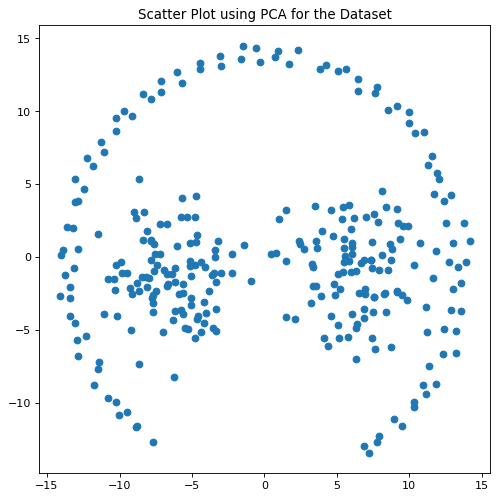

In [35]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

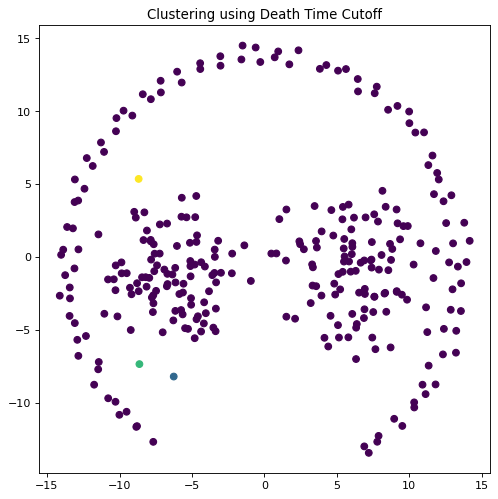

In [36]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

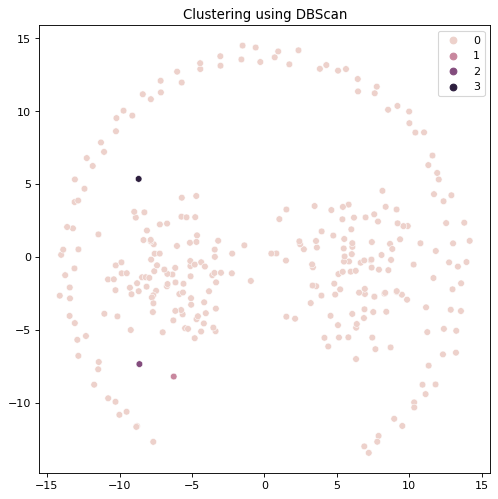

In [37]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


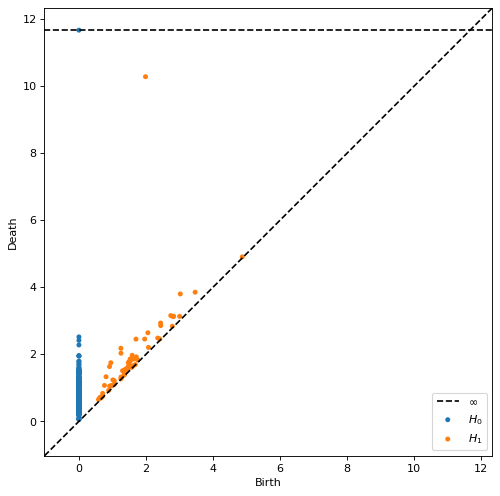

In [38]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 4, we have got 4 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 5

In [39]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set05.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [40]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.16965754370923064
Standard deviation of deaths:              0.33912613648542106
Death time cutoff:                         1.187035953165494
Number of clusters using this Death time:  8


In [41]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (599, 2)


In [42]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 8


## Plots

### <ol>PCA Scatter Plot

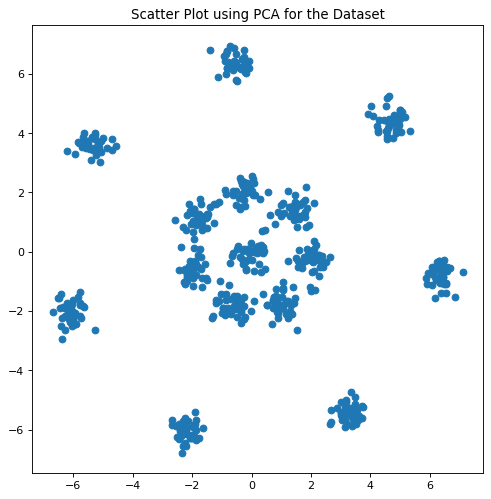

In [43]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

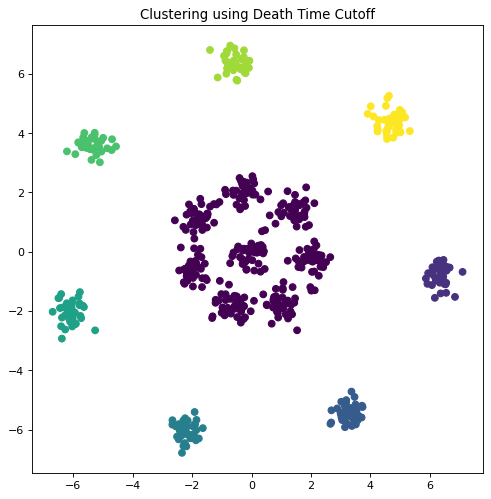

In [44]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

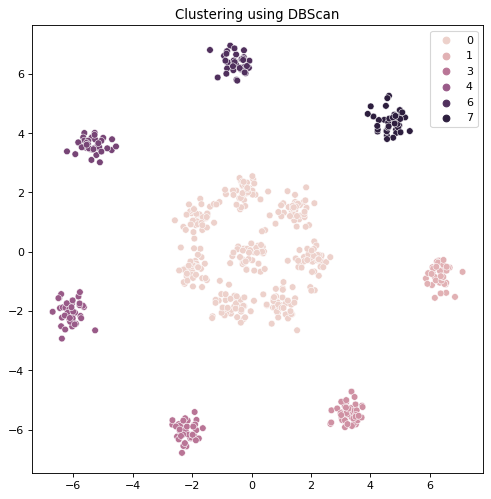

In [45]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


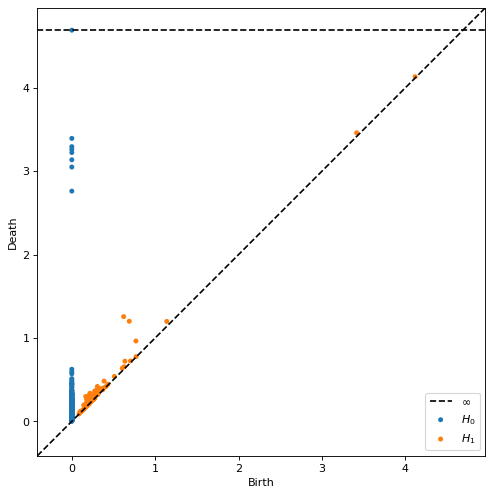

In [46]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 5, we have got 8 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 6

In [47]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set06.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [48]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.6051389176999369
Standard deviation of deaths:              0.3521140558539645
Death time cutoff:                         1.6614810852618305
Number of clusters using this Death time:  3


In [49]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (311, 2)


In [50]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 3


## Plots

### <ol>PCA Scatter Plot

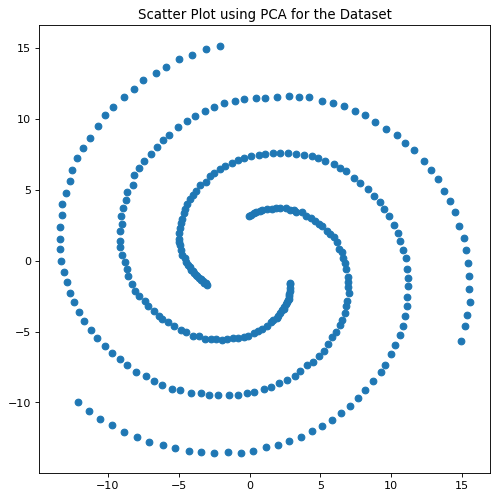

In [51]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

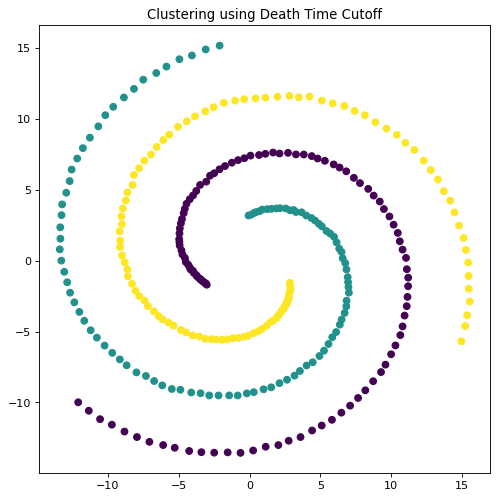

In [52]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

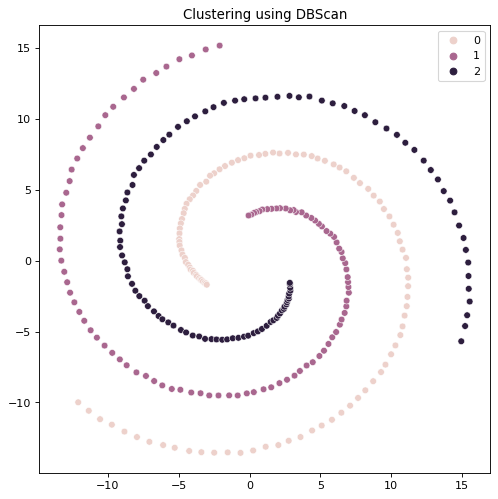

In [53]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


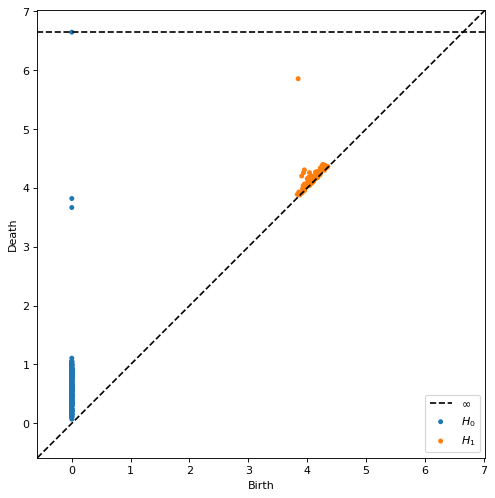

In [54]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 6, we have got 3 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 7

In [55]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set07.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [56]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      505252.3622725939
Standard deviation of deaths:              422107.1554902935
Death time cutoff:                         1771573.8287434743
Number of clusters using this Death time:  6


In [57]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (214, 5)


In [58]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 6


## Plots

### <ol>PCA Scatter Plot

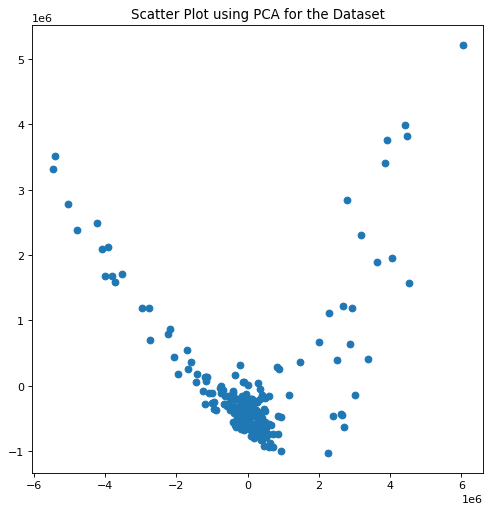

In [59]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

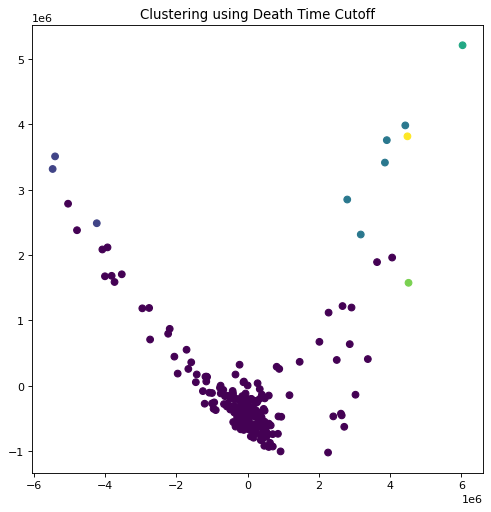

In [60]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

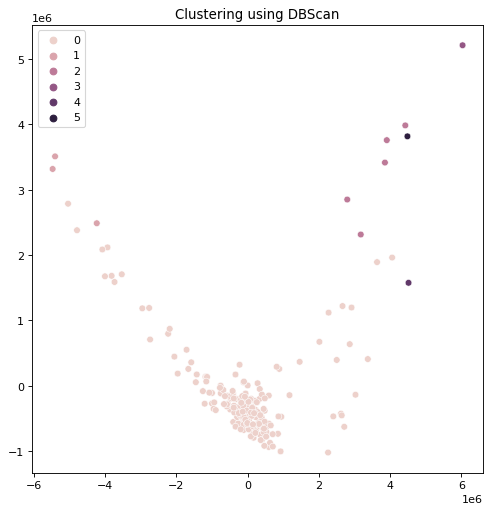

In [61]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


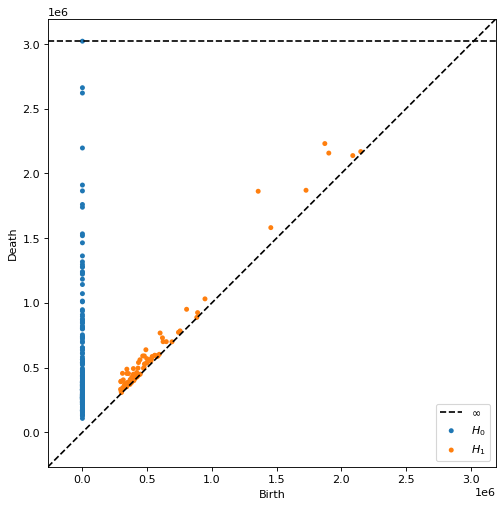

In [62]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 7, we have got 6 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 8

In [63]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set08.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [64]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      3.0568326295990693
Standard deviation of deaths:              1.7383907579839517
Death time cutoff:                         8.272004903550924
Number of clusters using this Death time:  3


In [65]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (698, 9)


In [66]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 3


## Plots

### <ol>PCA Scatter Plot

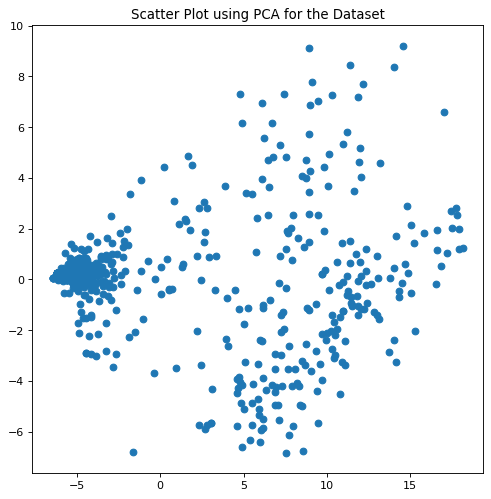

In [67]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

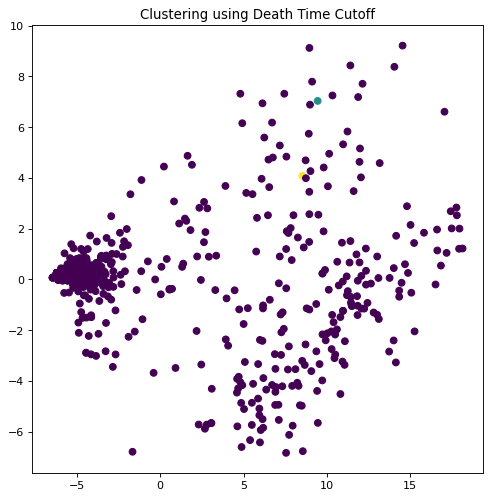

In [68]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

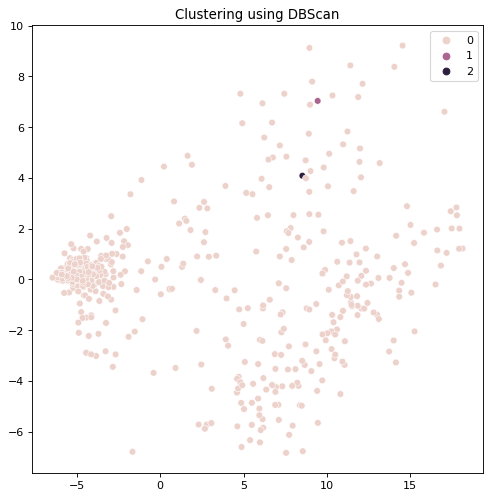

In [69]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


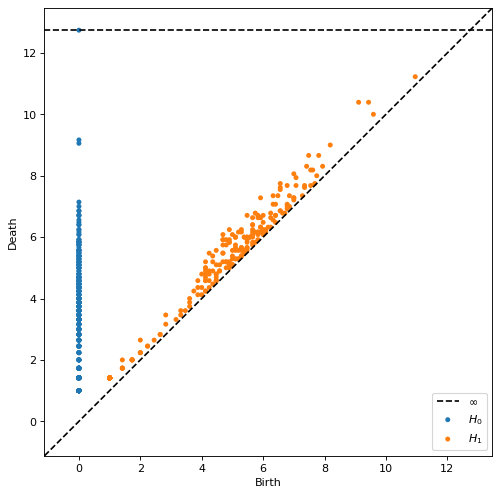

In [70]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 8, we have got 3 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 9

In [71]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set09.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [72]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      367105.6810344828
Standard deviation of deaths:              198963.63534197834
Death time cutoff:                         963996.5870604177
Number of clusters using this Death time:  3


In [73]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (149, 4)


In [74]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 3


## Plots

### <ol>PCA Scatter Plot

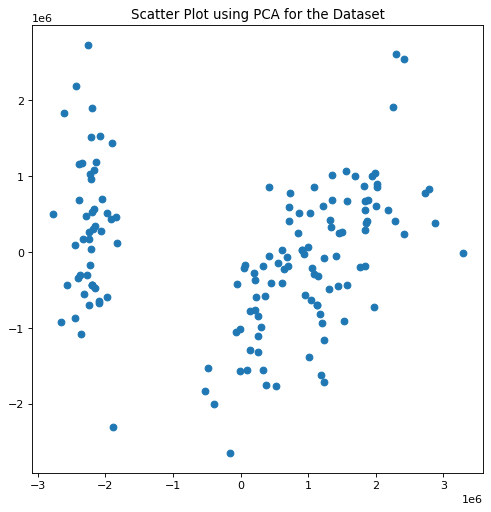

In [75]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

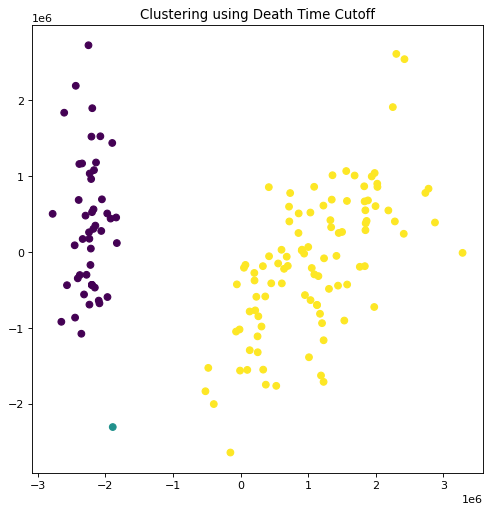

In [76]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

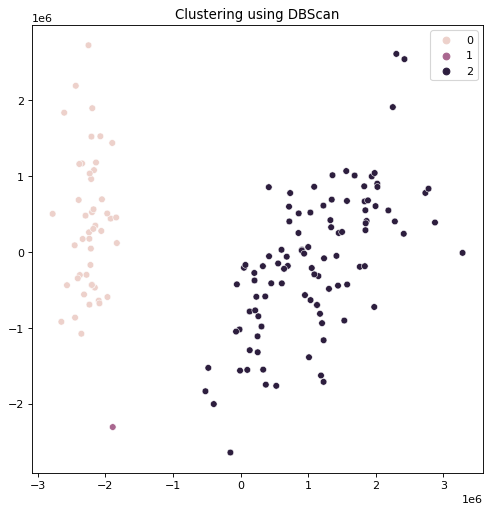

In [77]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


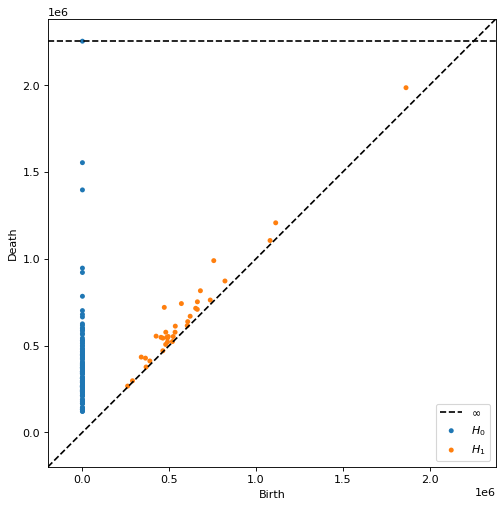

In [78]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 9, we have got 3 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 10

In [79]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set10.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [80]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      3788.506312400783
Standard deviation of deaths:              5364.067958554595
Death time cutoff:                         19880.710188064568
Number of clusters using this Death time:  9


In [81]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (439, 6)


In [82]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 9


## Plots

### <ol>PCA Scatter Plot

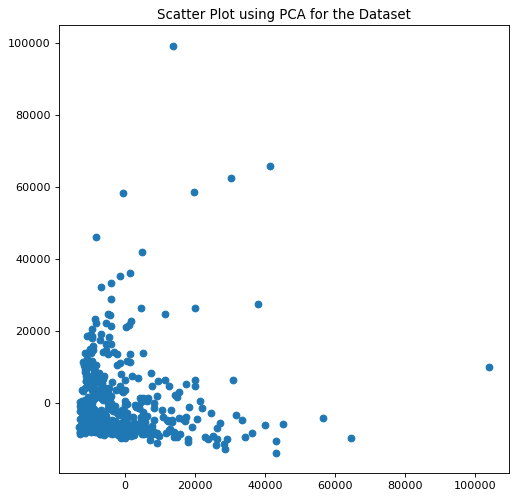

In [83]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

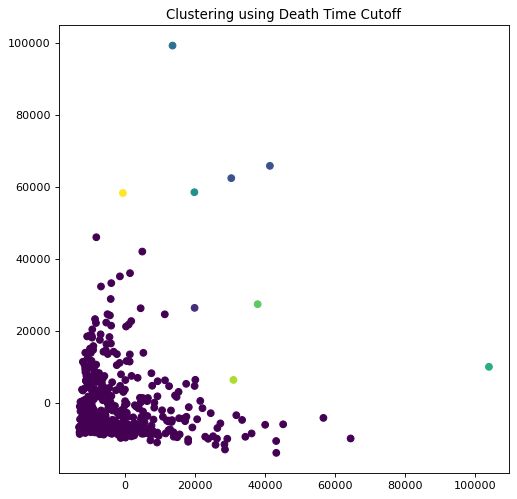

In [84]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

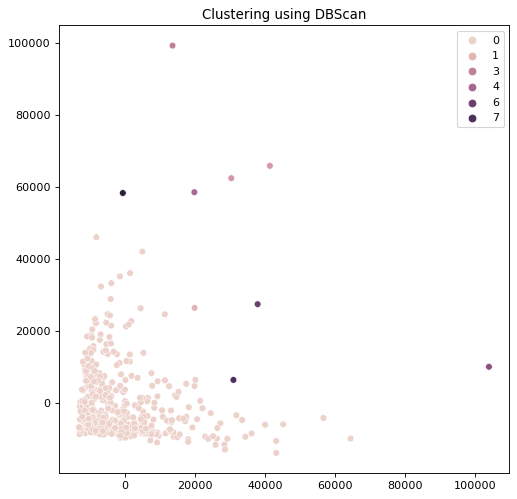

In [85]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


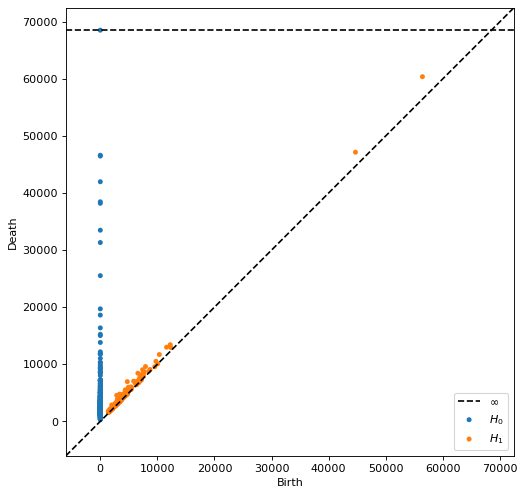

In [86]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 10, we have got 9 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 11

In [87]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set11.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [88]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      19.61953425214358
Standard deviation of deaths:              9.249192366776084
Death time cutoff:                         47.36711135247183
Number of clusters using this Death time:  2


In [89]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (248, 6)


In [90]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 2


## Plots

### <ol>PCA Scatter Plot

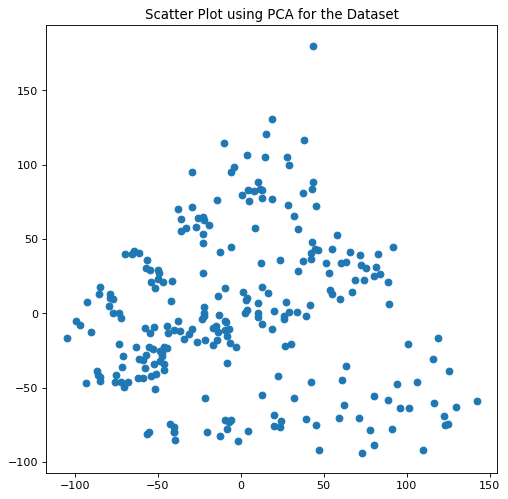

In [91]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

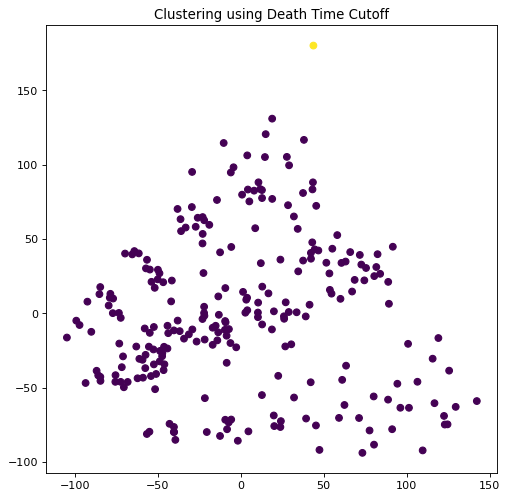

In [92]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

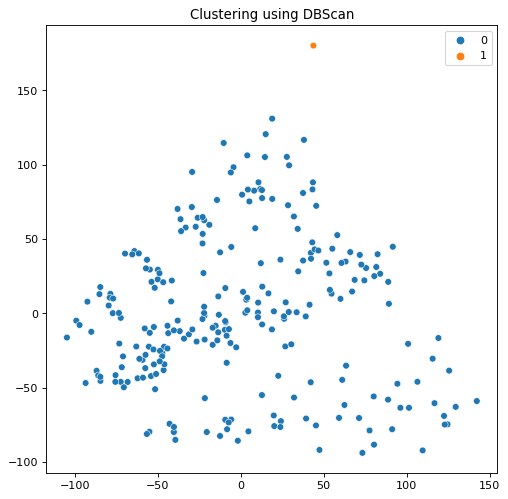

In [93]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


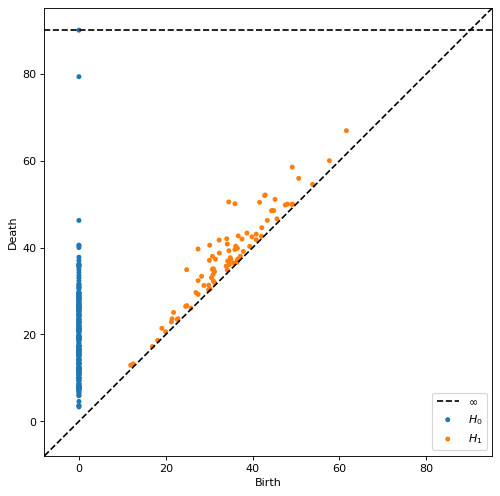

In [94]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 11, we have got 2 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 12

In [95]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set12.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [96]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.4800504730369761
Standard deviation of deaths:              0.18777316743202038
Death time cutoff:                         1.0433699753330372
Number of clusters using this Death time:  19


In [97]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (979, 10)


In [98]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 19


## Plots

### <ol>PCA Scatter Plot

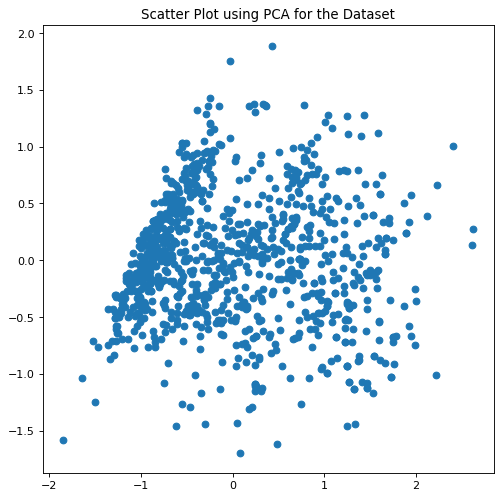

In [99]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

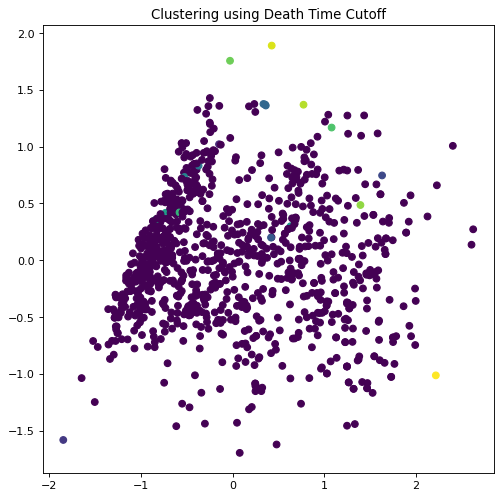

In [100]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

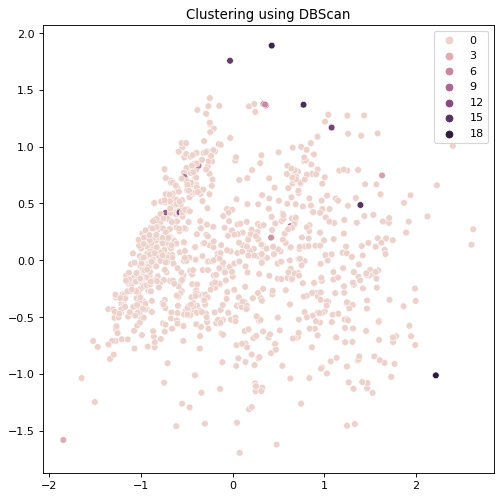

In [101]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


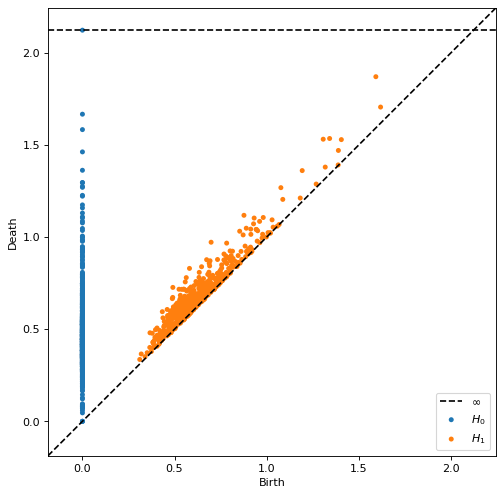

In [102]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 12, we have got 19 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**

# Dataset 13

In [103]:
data = np.array(pd.read_excel("C:/Users/DELL/cluster_data/set13.xlsx"))
pca = PCA(2)
pca.fit(data)
pca_data = pca.transform(data)
diagrams = ripser(data)['dgms']
deaths0 = diagrams[0][:-1,1]
minimum = deaths0.mean()-3*deaths0.std()
maximum = deaths0.mean()+3*deaths0.std()
n_clusters = sum(deaths0>maximum)+1

In [104]:
print("Mean value of deaths:                     ", deaths0.mean())
print("Standard deviation of deaths:             ", deaths0.std())
print("Death time cutoff:                        ",maximum)
print("Number of clusters using this Death time: ", n_clusters)

Mean value of deaths:                      0.5912721510983348
Standard deviation of deaths:              0.727603305037694
Death time cutoff:                         2.7740820662114167
Number of clusters using this Death time:  4


In [105]:
clusters = [[] for x in range(n_clusters)]
clusters[0].append(0)
unassigned = list(range(1,data.shape[0]))
distances = ripser(data)["dperm2all"]
cluster_pos = 0
tries = 0
while(len(all_assigned_points(clusters)) < data.shape[0]):
    if(len(clusters[cluster_pos]) == 0):
        clusters[cluster_pos].append(unassigned[0])
        unassigned.remove(unassigned[0])
    for point in unassigned:
        if(near_cluster(point, clusters[cluster_pos], distances, maximum)):
            clusters[cluster_pos].append(point)
    tries += 1
    unassigned = [x for x in range(data.shape[0]) if x not in all_assigned_points(clusters)]
    if(tries >= len(unassigned)*2-1):
        cluster_pos = (cluster_pos + 1)%n_clusters
        tries = 0
df = pd.DataFrame(data)
print("Shape of Data:", df.shape)
df["cluster"] = df.index.to_series().apply(lambda x: get_cluster(x, clusters))

Shape of Data: (213, 9)


In [106]:
clustering = DBSCAN(eps=maximum, min_samples=1).fit(data)
print("No of clusters using DBSCan:", len(set(clustering.labels_)))

No of clusters using DBSCan: 4


## Plots

### <ol>PCA Scatter Plot

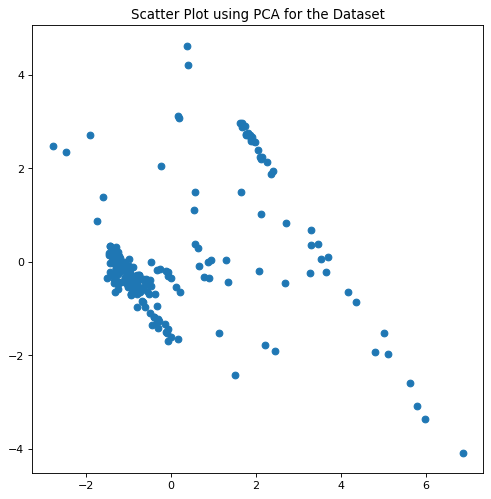

In [107]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,1)
plt.title('Scatter Plot using PCA for the Dataset')
plt.scatter(pca_data[:,0], pca_data[:,1])

### <ol>Clusters made from death time cutoff

Text(0.5, 1.0, 'Clustering using Death Time Cutoff')

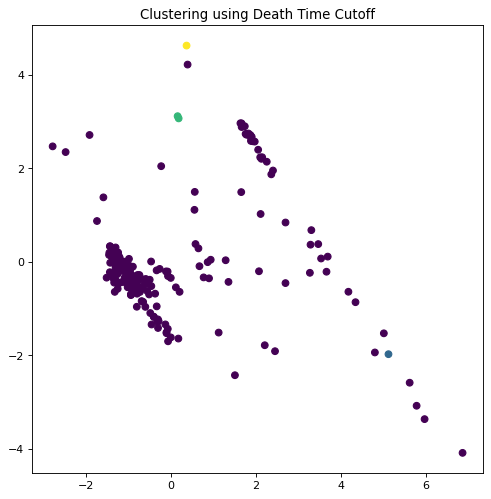

In [108]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2, 2,3)
plt.scatter(pca_data[:,0],pca_data[:,1], c = df["cluster"])
plt.title('Clustering using Death Time Cutoff')

### <ol>Clusters made from DBScan

Text(0.5, 1.0, 'Clustering using DBScan')

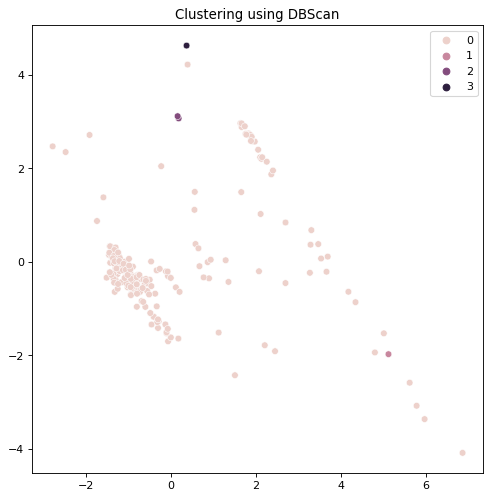

In [109]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,4)
sns.scatterplot(pca_data[:,0],pca_data[:,1], hue = clustering.labels_)
plt.title('Clustering using DBScan')

### <ol>Persistence Diagram

          Persistence Diagram


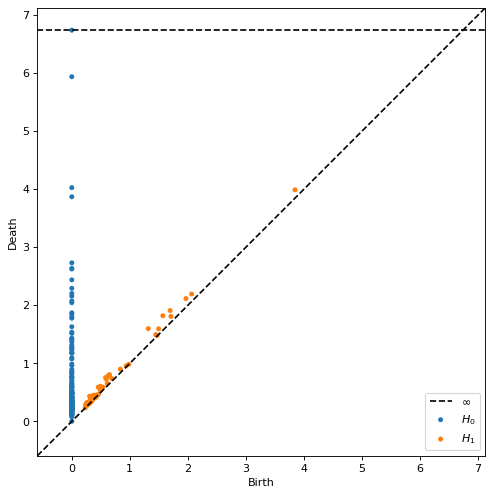

In [110]:
figure(figsize=(16,16), dpi=80)
plt.subplot(2,2,2)
print("          Persistence Diagram")
plot_diagrams(diagrams, show=True, lifetime = False)

## Analysis

**For this Dataset 13, we have got 4 clusters using both the ways, i.e with Death value cutoff as well as our DBScan algorithm.**